In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [42]:
movies=pd.read_csv("../../Data_sets/movies_2.csv")

In [3]:
movies.isna().sum()

MovieID           0
Title             1
MPAA Rating       1
Budget            1
Gross             1
Release Date      1
Genre             1
Runtime           1
Rating          108
Rating Count    108
Summary         120
dtype: int64

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


In [43]:
movies.drop(labels="Summary",axis=1,inplace=True)

In [44]:
movies.drop(labels=[615],axis=0,inplace=True)

In [45]:
movies["Budget"].dropna(axis=0,inplace=True)

In [11]:
movies.isna().sum()

MovieID           0
Title             0
MPAA Rating       0
Budget            0
Gross             0
Release Date      0
Genre             0
Runtime           0
Rating          107
Rating Count    107
dtype: int64

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       615 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 48.2+ KB


In [46]:


movies["Rating"] = movies["Rating"].astype(float)


In [23]:
movies.dtypes

MovieID           int64
Title            object
MPAA Rating      object
Budget            int64
Gross             int64
Release Date     object
Genre            object
Runtime         float64
Rating          float64
Rating Count    float64
dtype: object

In [47]:

movies.rename(str.lower,axis="columns",inplace=True)

In [48]:
movies.rename(columns={"mpaa rating":"mpaa_rating","release date":"release_date","rating count":"rating_count"},inplace=True)

In [49]:
movies.isnull().sum()

movieid           0
title             0
mpaa_rating       0
budget            0
gross             0
release_date      0
genre             0
runtime           0
rating          107
rating_count    107
dtype: int64

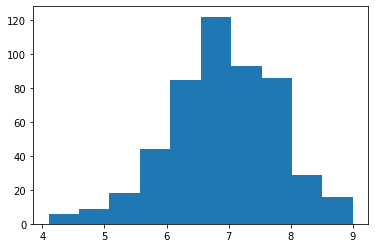

In [56]:
#Distribution RATING (negatevly skewed )

plt.hist(movies["rating"])
plt.show()

In [71]:
print("median", stats.median(movies["rating"]))
print("mean",np.mean(movies["rating"]))
print("mode", stats.mode(movies["rating"]))
print("st_deviation",np.std(movies["rating"]))




median 7.2
mean 6.917322834645666
mode 6.9
st_deviation 0.8880523223740002


In [72]:
movies["rating"].fillna(value=movies["rating"].median(),inplace=True)

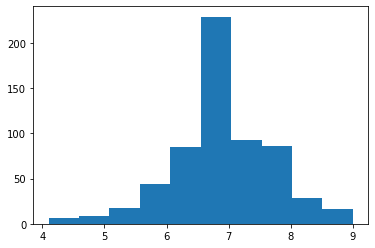

median 6.9
mean 6.914308943089427
mode 6.9
st_deviation 0.8071369468037188


In [74]:
#Distribution RATING (Normal)
# after replacing missing values

plt.hist(movies["rating"])
plt.show()
print("median", stats.median(movies["rating"]))
print("mean",np.mean(movies["rating"]))
print("mode", stats.mode(movies["rating"]))
print("st_deviation",np.std(movies["rating"]))

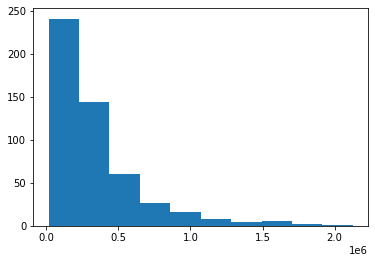

median 317843.0
mean 339252.1200787402
mode 91415.0
st_deviation 321022.4018045004


In [77]:
#Distribution RATING_ COUNT (positvely skewed )
plt.hist(movies["rating_count"])
plt.show()
print("median", stats.median(movies["rating_count"]))
print("mean", np.mean(movies["rating_count"]))
print("mode", stats.mode(movies["rating_count"]))
print("st_deviation",np.std(movies["rating_count"]))

In [78]:
movies["rating_count"].fillna(value=movies["rating_count"].median(),inplace=True)

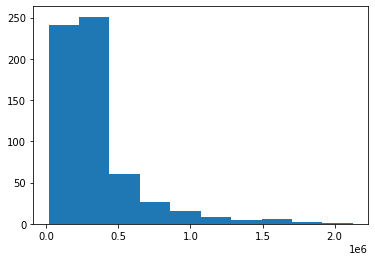

median 240347.5
mean 322044.3243902439
mode 240347.5
st_deviation 294161.93477745407


In [79]:
#Distribution RATING_count (Normal)
# after replacing missing values

plt.hist(movies["rating_count"])
plt.show()
print("median", stats.median(movies["rating_count"]))
print("mean", np.mean(movies["rating_count"]))
print("mode", stats.mode(movies["rating_count"]))
print("st_deviation",np.std(movies["rating_count"]))